In [16]:
import numpy as np
import cv2
import commonfunctions as cf

In [22]:
from scipy import fftpack
# This function applies a filter to an image in the frequency domain
# and plots multiple images describing the process
def apply_filter_in_freq(img, f):
    img_in_freq = fftpack.fft2(img)
    
    # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
    filter_in_freq = fftpack.fft2(f, img.shape)
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = fftpack.ifft2(filtered_img_in_freq)

    return filtered_img
   
def LPF(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    f1=np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
    ])

    filtered_img = apply_filter_in_freq(gray, f1)
    #cf.show_images([np.abs(filtered_img)], ['Filtered Image'])
    return filtered_img
    # cv2.imwrite("F1/LPF.png",np.int64( np.abs(filtered_img) ) )
    # cv2.imshow("filtered_img",np.int8( np.abs(filtered_img) ) )
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


 




In [18]:
def getBinaryBit(pixel,neighbors):    
    if pixel < neighbors:
         return 0
    else:
        return 1  

In [19]:
def binaryToDecimal(BP):
    # 8 values as we have 8 neighbors
    powers_of_two = [1, 2, 4, 8, 16, 32, 64, 128]
    decimal_value = 0
    for i in range(len(BP)):
        decimal_value += BP[i] * powers_of_two[i]
    return decimal_value

In [20]:
#   Local binary pattern LBP 
        #  j
        #  |
        #  |______ i
        #
        # | top left    |  top    | top right    |
        # | left        |  pixel  |  right       |
        # |bottom left  | bottom  | bottom right |
        #
def LBP(img):
    height=img.shape[0]
    width=img.shape[1]
    print(width)
    BP=[]  # binary pattern
    LBP_Img = np.zeros((height, width),np.uint8) # new img with LBP values
    for i in range (0 ,height):
        for j in range (0 ,width):
            #boundaries:
            if i == 0 or j == 0 or ( i == 0 and j == 0 ):
                continue
            if j == width-1 or i == height-1 or ( j == width-1 and i == height-1 ):
                continue
            #clockwise neighbors
            #top left
            BP.append(getBinaryBit(img[i][j],img[i-1][j-1]))
            #top
            BP.append(getBinaryBit(img[i][j],img[i-1][j]))
            #top left
            BP.append(getBinaryBit(img[i][j],img[i-1][j+1]))
            #right
            BP.append(getBinaryBit(img[i][j],img[i][j+1]))
            #bottom right
            BP.append(getBinaryBit(img[i][j],img[i+1][j+1]))
            #bottom
            BP.append(getBinaryBit(img[i][j],img[i+1][j]))
            #bottom left
            BP.append(getBinaryBit(img[i][j],img[i+1][j-1]))
            #left
            BP.append(getBinaryBit(img[i][j],img[i][j-1]))
            #put value of the pixel as the decimal number of the binary pattern
            LBP_Img[i][j]=binaryToDecimal(BP)
            BP=[] # reset the binary pattern vector
    return LBP_Img

613


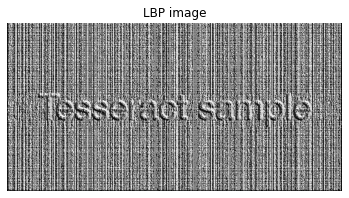

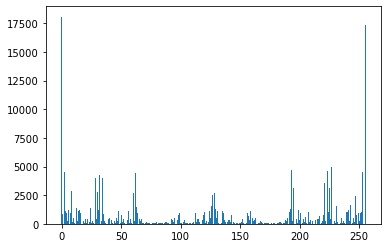

In [25]:
# img = cv2.imread("F1/original.png")
img =  cv2.imread("test.png")
out_img=LBP(LPF(img))
cf.show_images([np.abs(out_img)], ['LBP image'])

cf.showHist(out_img)